In [ ]:
import folium
import osmnx as ox
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon

In [ ]:
query = "Sumidaku,Tokyo,Japan"
G = ox.graph_from_place(query, network_type="drive") #walk, bike, all

In [ ]:
print(G)

MultiDiGraph with 4397 nodes and 11530 edges


In [ ]:
#ox.plot_graph_folium(G)

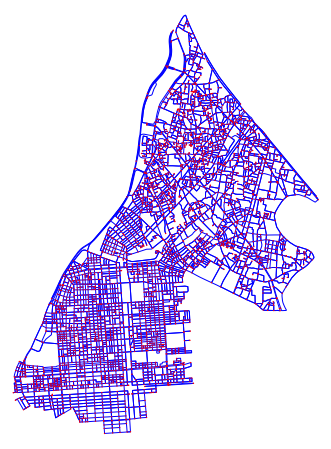

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [ ]:
ox.plot_graph(G, bgcolor="white", node_color="red", edge_color="blue", node_size=2)

## GeoPandasでの読み込み

In [ ]:
gdf1 = ox.graph_to_gdfs(G)[0] #0:node
gdf1

,y,x,highway,street_count,ref,geometry
osmid,,,,,,
251146092,35.701237,139.814639,traffic_signals,4,NaN,POINT (139.81464 35.70124)
252409713,35.688434,139.806051,traffic_signals,4,NaN,POINT (139.80605 35.68843)
252409715,35.688755,139.810749,traffic_signals,4,NaN,POINT (139.81075 35.68875)
253886312,35.726275,139.822488,NaN,4,NaN,POINT (139.82249 35.72628)
253886315,35.722408,139.818303,traffic_signals,4,NaN,POINT (139.81830 35.72241)
...,...,...,...,...,...,...
8409143675,35.717313,139.818605,NaN,3,NaN,POINT (139.81860 35.71731)
8409143678,35.720421,139.822340,NaN,4,NaN,POINT (139.82234 35.72042)
8888284779,35.693160,139.815220,NaN,3,NaN,POINT (139.81522 35.69316)


In [ ]:
gdf2 = ox.graph_to_gdfs(G)[1] #1:edge
gdf2

osmid  oneway  ref   name  \
u          v          key                                               
251146092  849152334  0                 135838438    True  315  蔵前橋通り   
           1199866959 0                 312194995    True  465  四ツ目通り   
252409713  1695023770 0                 319196849   False  319  三ツ目通り   
           1197987502 0                 135704881    True   50  新大橋通り   
           1197985792 0                 319196849   False  319  三ツ目通り   
...                                           ...     ...  ...    ...   
8888284779 849152333  0                 960810630    True  465  四ツ目通り   
8888284780 8888284785 0                 960810628    True  465  四ツ目通り   
           1672911950 0                 154824103   False  NaN    NaN   
8888284785 1695812892 0    [960810626, 960810636]    True  465  四ツ目通り   
           1674804708 0     [960810627, 71366318]    True  NaN    NaN   

                                 highway   length maxspeed  \
u          v          key                                    
251146092  849152334  0          primary    8.718      NaN   
           1199866959 0        secondary   35.462       50   
252409713  1695023770 0          primary    7.524      NaN   
           1197987502 0          primary  108.751      NaN   
           1197985792 0          primary   54.386      NaN   
...                                  ...      ...      ...   
8888284779 849152333  0        secondary    3.435      NaN   
8888284780 8888284785 0        secondary   22.647      NaN   
           1672911950 0      residential   33.465       30   
8888284785 1695812892 0        secondary   16.146      NaN   
           1674804708 0    motorway_link   23.368      NaN   

                                                                    geometry  \
u          v          key                                                      
251146092  849152334  0    LINESTRING (139.81464 35.70124, 139.81474 35.7...   
           1199866959 0    LINESTRING (139.81464 35.70124, 139.81463 35.7...   
252409713  1695023770 0    LINESTRING (139.80605 35.68843, 139.80606 35.6...   
           1197987502 0    LINESTRING (139.80605 35.68843, 139.80672 35.6...   
           1197985792 0    LINESTRING (139.80605 35.68843, 139.80602 35.6...   
...                                                                      ...   
8888284779 849152333  0    LINESTRING (139.81522 35.69316, 139.81522 35.6...   
8888284780 8888284785 0    LINESTRING (139.81534 35.69343, 139.81536 35.6...   
           1672911950 0    LINESTRING (139.81534 35.69343, 139.81546 35.6...   
8888284785 1695812892 0    LINESTRING (139.81536 35.69323, 139.81536 35.6...   
           1674804708 0    LINESTRING (139.81536 35.69323, 139.81542 35.6...   

                            lanes access width tunnel bridge  
u          v          key                                     
251146092  849152334  0       NaN    NaN   NaN    NaN    NaN  
           1199866959 0       NaN    NaN   NaN    NaN    NaN  
252409713  1695023770 0         2    NaN   NaN    NaN    NaN  
           1197987502 0       NaN    NaN   NaN    NaN    NaN  
           1197985792 0         2    NaN   NaN    NaN    NaN  
...                           ...    ...   ...    ...    ...  
8888284779 849152333  0         3    NaN   NaN    NaN    NaN  
8888284780 8888284785 0         4    NaN   NaN    NaN    NaN  
           1672911950 0         2    NaN   NaN    NaN    NaN  
8888284785 1695812892 0    [3, 2]    NaN   NaN    NaN    NaN  
           1674804708 0         1    NaN   NaN    NaN    NaN  

[11530 rows x 13 columns]

## 最短経路

In [ ]:
skytree = (35.7100, 139.8108)
museum = (35.6963, 139.7967)

In [ ]:
start = ox.get_nearest_node(G, skytree)
end = ox.get_nearest_node(G, museum)

/opt/conda/lib/python3.9/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/opt/conda/lib/python3.9/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


In [ ]:
shortest_path = ox.shortest_path(G, start, end)
new_fmap = ox.plot_route_folium(G, shortest_path, color='red')

In [ ]:
folium.Marker(location=skytree, tooltip='start').add_to(new_fmap)
folium.Marker(location=museum, tooltip='end').add_to(new_fmap)

In [ ]:
new_fmap